In [9]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import plotly.graph_objs as go 
import plotly.express as px 


In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import warnings
warnings.filterwarnings('ignore')

In [13]:
Datos = pd.read_csv('Mall_Customers.csv')

In [15]:
Datos.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [17]:

Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

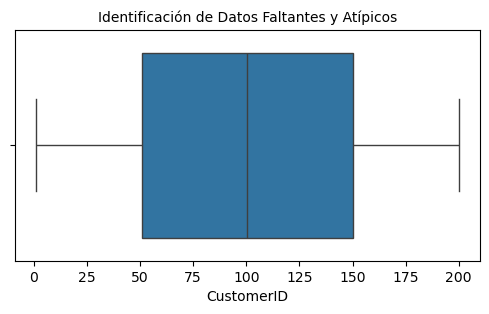

In [21]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['CustomerID'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

Text(0.5, 1.0, ' Datos Atípicos')

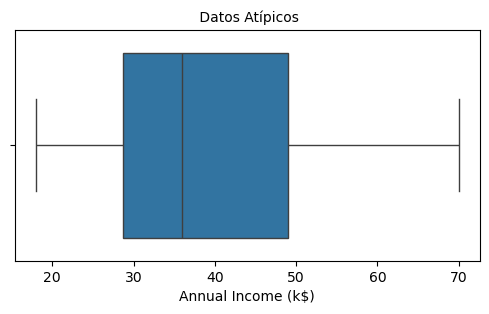

In [41]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title(' Datos Atípicos', fontsize=10 )

In [27]:
print("Cantidad de Registros con cero en Age: ",Datos['Age'].isin([0]).sum())
print("Annual Income (k$) ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100)",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Annual Income (k$)  0
Cantidad de Registros con cero en Spending Score (1-100) 0


In [29]:
Datos['Annual Income (k$)']=Datos['Age'].replace(0,Datos['Spending Score (1-100)'].mean())

In [31]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [49]:
np.random.seed()
np.random.seed(
12)
months = ["age", "Gender ", "CustomerID "]

In [71]:
Datos = Datos[["Annual Income (k$)","Spending Score (1-100)","CustomerID"]]

In [73]:
Datos.head(10)

,Annual Income (k$),Spending Score (1-100),CustomerID
0,19,39,1
1,21,81,2
2,20,6,3
3,23,77,4
4,31,40,5
5,22,76,6
6,35,6,7
7,23,94,8
8,64,3,9
9,30,72,10


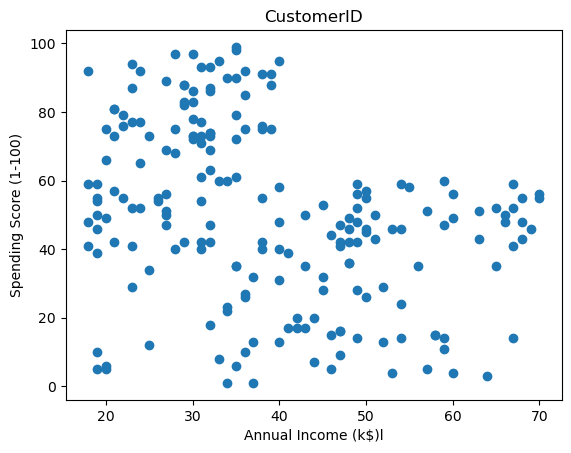

In [75]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)l')
plt.ylabel('Spending Score (1-100)')
plt.title('CustomerID')
plt.show()

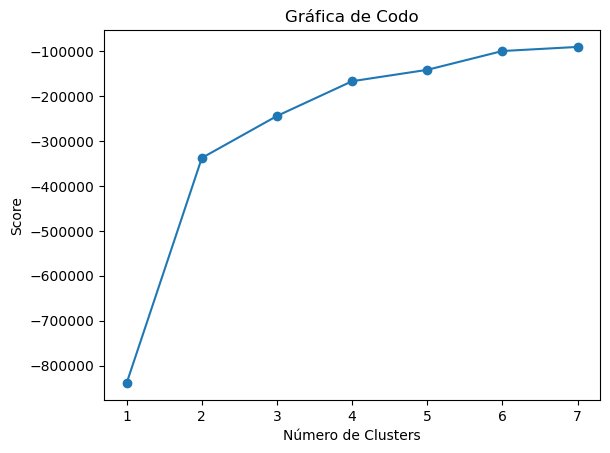

In [147]:
Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

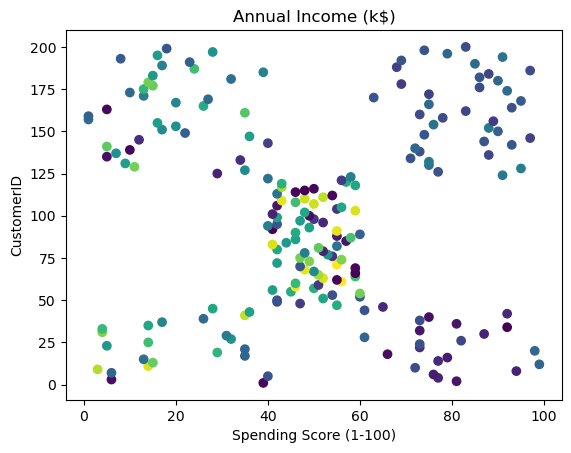

In [153]:
plt.scatter(Datos['Spending Score (1-100)'], Datos['CustomerID'], c=Datos['Annual Income (k$)'], cmap='viridis')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('CustomerID')
plt.title('Annual Income (k$)')
plt.show()

In [157]:
# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('CustomerID', axis=1)
clusters = Datos['CustomerID']


In [171]:
# Imprime la tabla
from tabulate import tabulate
print(tabulate(data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------+----------------------+
| Metric |        Value         |
+--------+----------------------+
|   0    |   1,Male,19,15,39    |
|   1    |   2,Male,21,15,81    |
|   2    |   3,Female,20,16,6   |
|   3    |  4,Female,23,16,77   |
|   4    |  5,Female,31,17,40   |
|   5    |  6,Female,22,17,76   |
|   6    |   7,Female,35,18,6   |
|   7    |  8,Female,23,18,94   |
|   8    |    9,Male,64,19,3    |
|   9    |  10,Female,30,19,72  |
|   10   |   11,Male,67,19,14   |
|   11   |  12,Female,35,19,99  |
|   12   |  13,Female,58,20,15  |
|   13   |  14,Female,24,20,77  |
|   14   |   15,Male,37,20,13   |
|   15   |   16,Male,22,20,79   |
|   16   |  17,Female,35,21,35  |
|   17   |   18,Male,20,21,66   |
|   18   |   19,Male,52,23,29   |
|   19   |  20,Female,35,23,98  |
|   20   |   21,Male,35,24,35   |
|   21   |   22,Male,25,24,73   |
|   22   |  23,Female,46,25,5   |
|   23   |   24,Male,31,25,73   |
|   24   |  25,Female,54,28,14  |
|   25   |   26,Male,29,28,82   |
|   26   |  27